# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from clean_dataset import import_csv_data
import scipy.stats as stats
from clean_immo_datasetV2 import encode_categorical_features, preprocess_missing_values

#### Load clean csv

In [2]:
file_path = 'cleaned_real_estate_data.csv'
raw_df = import_csv_data(file_path)
raw_df

,id,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,roomCount,...,hasVisiophone,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,epcScore,price
0,20661494.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,100.0,NaN,...,True,False,1.0,False,False,True,7.0,NaN,C,399000.0
1,20647642.0,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,270.0,12.0,...,False,True,3.0,False,False,True,1.0,NaN,E,895000.0
2,20644816.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,87.0,NaN,...,False,False,1.0,False,False,True,2.0,NaN,F,465000.0
3,20659813.0,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,104.0,NaN,...,True,False,2.0,False,False,True,3.0,NaN,B,590000.0
4,20633249.0,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,71.0,NaN,...,False,False,1.0,False,False,False,NaN,NaN,E,289000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76098,20379774.0,HOUSE,HOUSE,4.0,2.0,EastFlanders,Maldegem,9990,242.0,NaN,...,False,False,NaN,True,False,False,NaN,NaN,NaN,649000.0
76099,20664347.0,APARTMENT,APARTMENT,3.0,1.0,Brussels,Jette,1090,94.0,NaN,...,True,False,1.0,False,False,True,10.0,NaN,D,279000.0
76100,20664354.0,APARTMENT,APARTMENT,3.0,1.0,FlemishBrabant,GrimbergenStrombeek-Bever,1853,113.0,NaN,...,False,False,1.0,False,False,True,9.0,NaN,B,299000.0
76101,20664377.0,APARTMENT,APARTMENT,3.0,2.0,WestFlanders,Westende,8434,111.0,4.0,...,False,False,2.0,False,False,True,NaN,NaN,A,325000.0


In [3]:
df_wo_missing = preprocess_missing_values(raw_df)


 Preprocessing missing values...
Filled missing garden orientations with 'UNKNOWN'
Filled missing terrace orientations with 'UNKNOWN'
EPC scores missing: 13630
Filled 0 missing hasAttic values with False
Filled 0 missing hasGarden values with False
Filled 0 missing hasBasement values with False
Filled 0 missing hasDressingRoom values with False
Filled 0 missing hasDiningRoom values with False
Filled 0 missing hasLift values with False
Filled 0 missing hasHeatPump values with False
Filled 0 missing hasPhotovoltaicPanels values with False
Filled 0 missing hasThermicPanels values with False
Filled 0 missing hasGarden values with False
Filled 0 missing hasAirConditioning values with False
Filled 0 missing hasArmoredDoor values with False
Filled 0 missing hasVisiophone values with False
Filled 0 missing hasTerrace values with False
Filled 0 missing hasOffice values with False
Filled 0 missing hasSwimmingPool values with False
Filled 0 missing hasFireplace values with False
Filled 0 missing

In [4]:
df_wo_missing

,id,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,roomCount,...,hasVisiophone,hasOffice,toiletCount,hasSwimmingPool,hasFireplace,hasTerrace,terraceSurface,terraceOrientation,epcScore,price
0,20661494.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,100.0,NaN,...,True,False,1.0,False,False,True,7.0,UNKNOWN,C,399000.0
1,20647642.0,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,270.0,12.0,...,False,True,3.0,False,False,True,1.0,UNKNOWN,E,895000.0
2,20644816.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,87.0,NaN,...,False,False,1.0,False,False,True,2.0,UNKNOWN,F,465000.0
3,20659813.0,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,104.0,NaN,...,True,False,2.0,False,False,True,3.0,UNKNOWN,B,590000.0
4,20633249.0,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,71.0,NaN,...,False,False,1.0,False,False,False,NaN,UNKNOWN,E,289000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76098,20379774.0,HOUSE,HOUSE,4.0,2.0,EastFlanders,Maldegem,9990,242.0,NaN,...,False,False,NaN,True,False,False,NaN,UNKNOWN,NaN,649000.0
76099,20664347.0,APARTMENT,APARTMENT,3.0,1.0,Brussels,Jette,1090,94.0,NaN,...,True,False,1.0,False,False,True,10.0,UNKNOWN,D,279000.0
76100,20664354.0,APARTMENT,APARTMENT,3.0,1.0,FlemishBrabant,GrimbergenStrombeek-Bever,1853,113.0,NaN,...,False,False,1.0,False,False,True,9.0,UNKNOWN,B,299000.0
76101,20664377.0,APARTMENT,APARTMENT,3.0,2.0,WestFlanders,Westende,8434,111.0,4.0,...,False,False,2.0,False,False,True,NaN,UNKNOWN,A,325000.0


In [5]:

df_encoded, encoders = encode_categorical_features(df_wo_missing)



 Starting categorical encoding...

 Encoding provinces...
Province encoding: {1: 8104, 2: 1931, 3: 11895, 4: 6450, 5: 10203, 6: 14264, 7: 6524, 8: 2807, 9: 3404, 10: 2787, 11: 7734}

 Encoding property types...
Type encoding: {2: 44996, 1: 31107}

 Encoding property subtypes...

 Encoding property subtypes...
Subtype encoding: {2: 33881, 1: 23828, 13: 3678, 7: 2445, 10: 1835, 6: 1767, 4: 1689, 3: 1375, 5: 1263, 9: 800, 8: 543, 14: 477, 17: 449, 20: 422, 18: 328, 21: 308, 19: 288, 12: 257, 11: 151, 15: 151, 23: 68, 22: 53, 16: 46, 24: 1}

 Encoding localities...
Locality encoded: 76103 localities

 Encoding garden orientation...
Garden orientation encoded: {0: 70509, 3: 1754, 4: 1547, 2: 1103, 1: 864, 5: 326}

 Encoding terrace orientation...
Terrace orientation encoded: {0: 64884, 3: 3621, 4: 3111, 2: 2429, 1: 1506, 5: 552}

 Encoding EPC scores...
EPC encoding: {1.0: 4229, 2.0: 8509, 3.0: 6471, 4.0: 9863, 5.0: 11906, 6.0: 13056, 7.0: 8439}

 Encoding boolean features...
hasAttic enco

In [6]:
encoders

{'province_mapping': {'Brussels': 1,
  'Luxembourg': 2,
  'Antwerp': 3,
  'FlemishBrabant': 4,
  'EastFlanders': 5,
  'WestFlanders': 6,
  'Liège': 7,
  'WalloonBrabant': 8,
  'Limburg': 9,
  'Namur': 10,
  'Hainaut': 11},
 'type_mapping': {'APARTMENT': 1, 'HOUSE': 2},
 'subtype_mapping': {'APARTMENT': 1,
  'HOUSE': 2,
  'FLAT_STUDIO': 3,
  'FLATSTUDIO': 3,
  'DUPLEX': 4,
  'PENTHOUSE': 5,
  'GROUND_FLOOR': 6,
  'GROUNDFLOOR': 6,
  'APARTMENT_BLOCK': 7,
  'APARTMENTBLOCK': 7,
  'MANSION': 8,
  'EXCEPTIONAL_PROPERTY': 9,
  'EXCEPTIONALPROPERTY': 9,
  'MIXED_USE_BUILDING': 10,
  'MIXEDUSEBUILDING': 10,
  'TRIPLEX': 11,
  'LOFT': 12,
  'VILLA': 13,
  'TOWN_HOUSE': 14,
  'TOWNHOUSE': 14,
  'CHALET': 15,
  'MANOR_HOUSE': 16,
  'MANORHOUSE': 16,
  'SERVICE_FLAT': 17,
  'SERVICEFLAT': 17,
  'KOT': 18,
  'FARMHOUSE': 19,
  'BUNGALOW': 20,
  'COUNTRY_COTTAGE': 21,
  'COUNTRYCOTTAGE': 21,
  'OTHER_PROPERTY': 22,
  'OTHERPROPERTY': 22,
  'CASTLE': 23,
  'PAVILION': 24},
 'locality_encoder': Label

In [7]:
df_encoded

,id,type,subtype,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,roomCount,...,hasPhotovoltaicPanels_encoded,hasThermicPanels_encoded,hasAirConditioning_encoded,hasArmoredDoor_encoded,hasVisiophone_encoded,hasTerrace_encoded,hasOffice_encoded,hasSwimmingPool_encoded,hasFireplace_encoded,hasLivingRoom_encoded
0,20661494.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,100.0,NaN,...,0,0,0,0,1,1,0,0,0,1
1,20647642.0,HOUSE,HOUSE,4.0,2.0,Brussels,Etterbeek,1040,270.0,12.0,...,0,0,0,0,0,1,1,0,0,1
2,20644816.0,APARTMENT,APARTMENT,2.0,1.0,Brussels,Etterbeek,1040,87.0,NaN,...,0,0,0,0,0,1,0,0,0,1
3,20659813.0,APARTMENT,APARTMENT,2.0,2.0,Brussels,Bruxelles,1040,104.0,NaN,...,0,0,0,1,1,1,0,0,0,1
4,20633249.0,APARTMENT,FLAT_STUDIO,1.0,1.0,Brussels,Etterbeek,1040,71.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76098,20379774.0,HOUSE,HOUSE,4.0,2.0,EastFlanders,Maldegem,9990,242.0,NaN,...,0,0,0,0,0,0,0,1,0,0
76099,20664347.0,APARTMENT,APARTMENT,3.0,1.0,Brussels,Jette,1090,94.0,NaN,...,0,0,0,0,1,1,0,0,0,1
76100,20664354.0,APARTMENT,APARTMENT,3.0,1.0,FlemishBrabant,GrimbergenStrombeek-Bever,1853,113.0,NaN,...,0,0,0,0,0,1,0,0,0,1
76101,20664377.0,APARTMENT,APARTMENT,3.0,2.0,WestFlanders,Westende,8434,111.0,4.0,...,0,0,0,0,0,1,0,0,0,1


#### Identifying the type of variables

In [8]:
df_encoded.dtypes

id                         float64
type                        object
subtype                     object
bedroomCount               float64
bathroomCount              float64
                            ...   
hasTerrace_encoded           int64
hasOffice_encoded            int64
hasSwimmingPool_encoded      int64
hasFireplace_encoded         int64
hasLivingRoom_encoded        int64
Length: 71, dtype: object

## Outliers

In [9]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

In [10]:
def identify_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] <= lower)], df[(df[col] >= upper)]

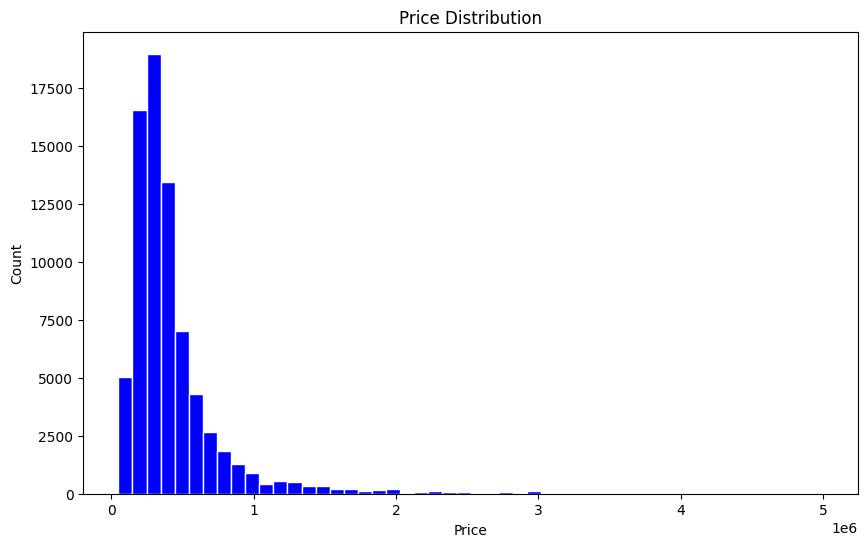

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df_encoded['price'], bins=50, color='blue', edgecolor='white')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

#### Outliers for price

In [12]:
df_encoded['price'].describe()

count    7.610300e+04
mean     4.351276e+05
std      4.127531e+05
min      5.000000e+04
25%      2.310000e+05
50%      3.295000e+05
75%      4.790000e+05
max      5.000000e+06
Name: price, dtype: float64

In [13]:
lower_outliers, upper_outliers = identify_outliers_iqr(df_encoded, 'price')

In [ ]:
lower_outliers

In [15]:
upper_outliers['subtype']

1                       HOUSE
6                      DUPLEX
7                      DUPLEX
15                  PENTHOUSE
16                      HOUSE
                 ...         
75573    EXCEPTIONAL_PROPERTY
75803                   HOUSE
75976                   HOUSE
75991                   HOUSE
75998                   VILLA
Name: subtype, Length: 5897, dtype: object

In [16]:
df_wo_price_outliers = remove_outliers_iqr(df_encoded, 'price')

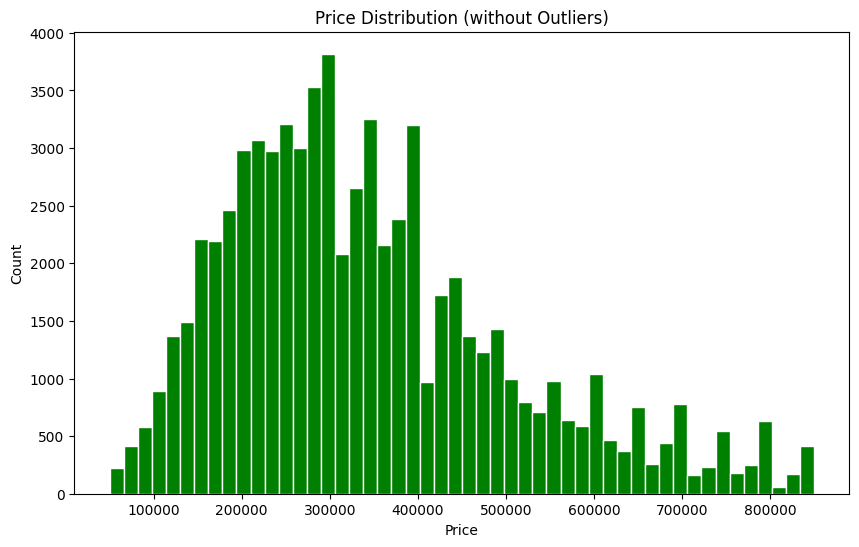

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df_wo_price_outliers['price'], bins=50, color='green', edgecolor='white')
plt.title('Price Distribution (without Outliers)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

#### Analyzing Outliers

##### By Subtype

In [39]:
num_bins = len(upper_outliers['subtype'].unique())
num_bins

20

Text(0.5, 1.0, 'Outliers price dsitribution by subtype')

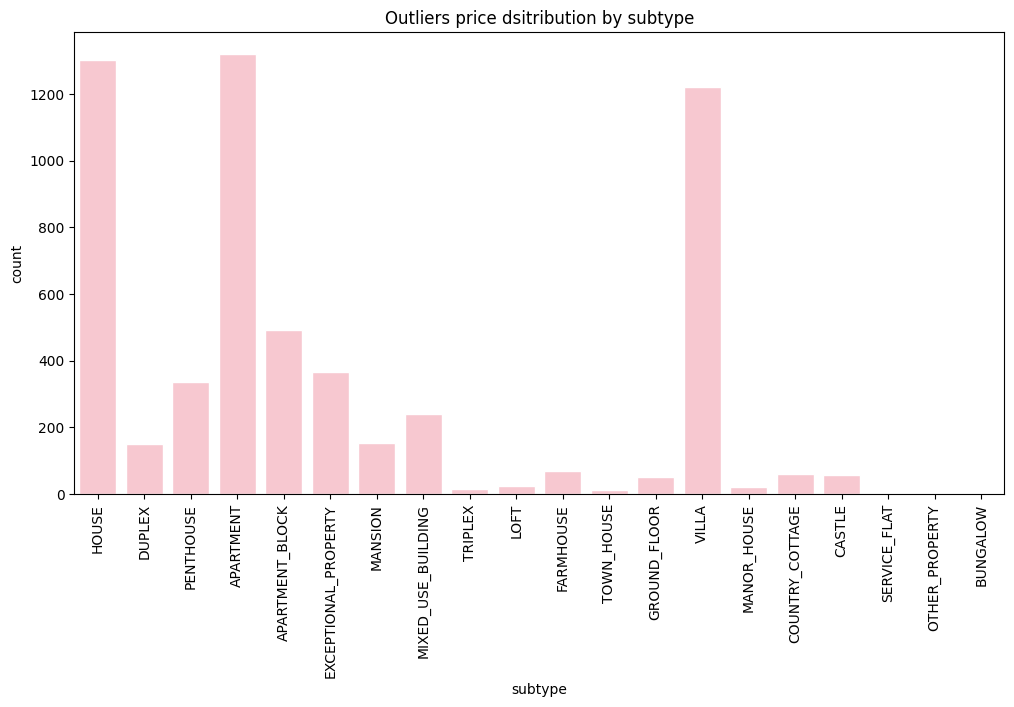

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(data=upper_outliers, x='subtype', color='pink', edgecolor='white')
plt.xticks(rotation=90)
plt.title('Outliers price dsitribution by subtype')

## Correlation Analysis

### Correlation for Continuous variables

In [90]:
df_continuous = df_encoded.select_dtypes(include='float64')
df_continuous = df_continuous.drop(columns=['id','locality_encoded'])
df_continuous.columns

Index(['bedroomCount', 'bathroomCount', 'habitableSurface', 'roomCount',
       'buildingConstructionYear', 'facedeCount', 'floorCount',
       'streetFacadeWidth', 'kitchenSurface', 'landSurface',
       'livingRoomSurface', 'gardenSurface', 'parkingCountIndoor',
       'parkingCountOutdoor', 'toiletCount', 'terraceSurface', 'price',
       'epcScore_encoded'],
      dtype='object')

In [ ]:
df_continuous = df_continuous.loc[:, ['price','bedroomCount', 'bathroomCount', 'habitableSurface', 'roomCount',
       'buildingConstructionYear', 'facedeCount', 'floorCount',
       'streetFacadeWidth', 'kitchenSurface', 'landSurface',
       'livingRoomSurface', 'gardenSurface', 'parkingCountIndoor',
       'parkingCountOutdoor', 'toiletCount', 'terraceSurface', 
       'epcScore_encoded']]  

print(df_continuous)

In [92]:
corr_matrix_cont = df_continuous.corr()
corr_matrix_cont

,price,bedroomCount,bathroomCount,habitableSurface,roomCount,buildingConstructionYear,facedeCount,floorCount,streetFacadeWidth,kitchenSurface,landSurface,livingRoomSurface,gardenSurface,parkingCountIndoor,parkingCountOutdoor,toiletCount,terraceSurface,epcScore_encoded
price,1.000000,0.370354,0.533044,0.095675,0.092305,0.027897,0.178696,-0.001912,0.010747,0.022763,0.257523,0.033139,0.117539,-0.003161,0.012285,0.479945,0.236779,0.160064
bedroomCount,0.370354,1.000000,0.546253,0.100626,0.301861,-0.214471,0.221120,-0.007050,0.012809,0.021160,0.110772,0.018114,0.138053,-0.007894,0.164211,0.586905,0.207772,-0.108558
bathroomCount,0.533044,0.546253,1.000000,0.080904,0.136046,-0.115466,0.078826,-0.003274,0.019838,0.015878,0.122183,0.021199,0.180877,-0.000508,0.156207,0.644378,0.183152,0.027306
habitableSurface,0.095675,0.100626,0.080904,1.000000,0.185470,-0.066428,0.044197,-0.000933,0.005959,0.012328,0.048290,0.003077,0.027646,-0.002143,0.004058,0.076622,0.030907,-0.006928
roomCount,0.092305,0.301861,0.136046,0.185470,1.000000,-0.055223,-0.045514,-0.015476,0.005813,0.001265,-0.002966,-0.003956,0.049447,-0.014177,0.070976,0.201337,0.139273,-0.054182
buildingConstructionYear,0.027897,-0.214471,-0.115466,-0.066428,-0.055223,1.000000,0.070953,-0.000132,0.010227,-0.022804,-0.046829,0.015963,-0.068537,0.000194,-0.001088,-0.111449,-0.069723,0.548854
facedeCount,0.178696,0.221120,0.078826,0.044197,-0.045514,0.070953,1.000000,-0.028731,0.020246,0.014773,0.151205,0.021846,0.086365,-0.010215,0.008223,0.150201,0.150073,-0.057076
floorCount,-0.001912,-0.007050,-0.003274,-0.000933,-0.015476,-0.000132,-0.028731,1.000000,-0.000752,-0.000529,-0.003641,-0.000395,-0.003287,0.000781,-0.001756,-0.006299,-0.003903,0.001639
streetFacadeWidth,0.010747,0.012809,0.019838,0.005959,0.005813,0.010227,0.020246,-0.000752,1.000000,0.008648,0.024713,0.003946,0.029963,0.003398,-0.000346,0.010544,0.008299,-0.010961
kitchenSurface,0.022763,0.021160,0.015878,0.012328,0.001265,-0.022804,0.014773,-0.000529,0.008648,1.000000,0.036574,0.117198,0.006019,-0.000039,0.003949,0.015916,0.006441,0.001701


In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix_cont, cmap ='RdBu', vmin =-1, vmax=1, annot =True, square = True)

#### Correlation for boolean

In [152]:
bool_cols= ['price'] + list(df_encoded.select_dtypes(include='bool').columns)
bool_cols

['price',
 'hasAttic',
 'hasBasement',
 'hasDressingRoom',
 'hasDiningRoom',
 'hasLift',
 'hasHeatPump',
 'hasPhotovoltaicPanels',
 'hasThermicPanels',
 'hasLivingRoom',
 'hasGarden',
 'hasAirConditioning',
 'hasArmoredDoor',
 'hasVisiophone',
 'hasOffice',
 'hasSwimmingPool',
 'hasFireplace',
 'hasTerrace']

In [ ]:
df_boolean = df_encoded[bool_cols]

,price,hasAttic,hasBasement,hasDressingRoom,hasDiningRoom,hasLift,hasHeatPump,hasPhotovoltaicPanels,hasThermicPanels,hasLivingRoom,hasGarden,hasAirConditioning,hasArmoredDoor,hasVisiophone,hasOffice,hasSwimmingPool,hasFireplace,hasTerrace
0,399000.0,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True
1,895000.0,True,True,False,True,False,False,False,False,True,True,False,False,False,True,False,False,True
2,465000.0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True
3,590000.0,False,False,False,False,True,False,False,False,True,False,False,True,True,False,False,False,True
4,289000.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76098,649000.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
76099,279000.0,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True
76100,299000.0,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True
76101,325000.0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True


##### Analysis with Point-biserial correlation

In [ ]:
point_biserial_corr = dict()

for col in df_boolean.columns:
    point_biserial_corr[col] = stats.pointbiserialr(df_encoded[col], df_encoded['price']).statistic

In [165]:
for k,v in point_biserial_corr.items():
    print(f"Correlation with {k} : {v}")

Correlation with hasAttic : -0.014810884949773449
Correlation with hasBasement : 0.024430601412475335
Correlation with hasDressingRoom : 0.09743258538901886
Correlation with hasDiningRoom : 0.05771560005779141
Correlation with hasLift : 0.025523833656135735
Correlation with hasHeatPump : 0.06467200611918142
Correlation with hasPhotovoltaicPanels : 0.05403369633133076
Correlation with hasThermicPanels : 0.050554408257983977
Correlation with hasLivingRoom : -0.040189008253493405
Correlation with hasGarden : 0.05347581012342016
Correlation with hasAirConditioning : 0.06695280400920212
Correlation with hasArmoredDoor : 0.11081100891066585
Correlation with hasVisiophone : 0.10493232479232839
Correlation with hasOffice : 0.1884184115432811
Correlation with hasSwimmingPool : 0.24868448967233475
Correlation with hasFireplace : 0.1262900219632501
Correlation with hasTerrace : 0.0812269774141897


In [180]:
sorted_bool_correlation = dict(sorted(point_biserial_corr.items(), key=lambda x:x[1], reverse = True))
sorted_bool_correlation 

{'hasSwimmingPool': np.float64(0.24868448967233475),
 'hasOffice': np.float64(0.1884184115432811),
 'hasFireplace': np.float64(0.1262900219632501),
 'hasArmoredDoor': np.float64(0.11081100891066585),
 'hasVisiophone': np.float64(0.10493232479232839),
 'hasDressingRoom': np.float64(0.09743258538901886),
 'hasTerrace': np.float64(0.0812269774141897),
 'hasAirConditioning': np.float64(0.06695280400920212),
 'hasHeatPump': np.float64(0.06467200611918142),
 'hasDiningRoom': np.float64(0.05771560005779141),
 'hasPhotovoltaicPanels': np.float64(0.05403369633133076),
 'hasGarden': np.float64(0.05347581012342016),
 'hasThermicPanels': np.float64(0.050554408257983977),
 'hasLift': np.float64(0.025523833656135735),
 'hasBasement': np.float64(0.024430601412475335),
 'hasAttic': np.float64(-0.014810884949773449),
 'hasLivingRoom': np.float64(-0.040189008253493405)}

#### Swimming Pool

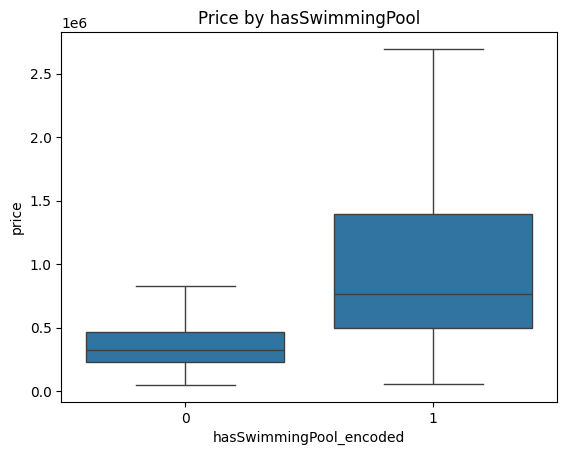

In [41]:

swimming_plot = sns.boxplot(x='hasSwimmingPool_encoded', y='price', data=df_encoded , showfliers=False )
plt.title('Price by hasSwimmingPool')
plt.show()

In [42]:
correlation_swimm_pool = df_encoded['hasSwimmingPool_encoded'].corr(df_encoded['price'])
print(f"Pearson correlation for 'price' vs 'hasSwimmingPool': {correlation_swimm_pool}")

Pearson correlation for 'price' vs 'hasSwimmingPool': 0.24868448967233517


In [154]:
stats.pointbiserialr(df_encoded['hasSwimmingPool'], df_encoded['price'] )

SignificanceResult(statistic=np.float64(0.24868448967233475), pvalue=np.float64(0.0))

#### Province

In [ ]:
df_province =df_encoded[['price', 'province']]
df_province 

In [40]:
df_province[['province']].value_counts()

province      
WestFlanders      14264
Antwerp           11895
EastFlanders      10203
Brussels           8104
Hainaut            7734
Liège              6524
FlemishBrabant     6450
Limburg            3404
WalloonBrabant     2807
Namur              2787
Luxembourg         1931
Name: count, dtype: int64

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='province', y='price', data=df_encoded,  showfliers=False )
plt.xticks(rotation=45)
plt.title('Price by Province')
plt.show()

#### Subtype

In [44]:
df_subtype = df_encoded[['price', 'subtype', 'subtype_encoded']]
df_subtype

,price,subtype,subtype_encoded
0,399000.0,APARTMENT,1
1,895000.0,HOUSE,2
2,465000.0,APARTMENT,1
3,590000.0,APARTMENT,1
4,289000.0,FLAT_STUDIO,3
...,...,...,...
76098,649000.0,HOUSE,2
76099,279000.0,APARTMENT,1
76100,299000.0,APARTMENT,1
76101,325000.0,APARTMENT,1


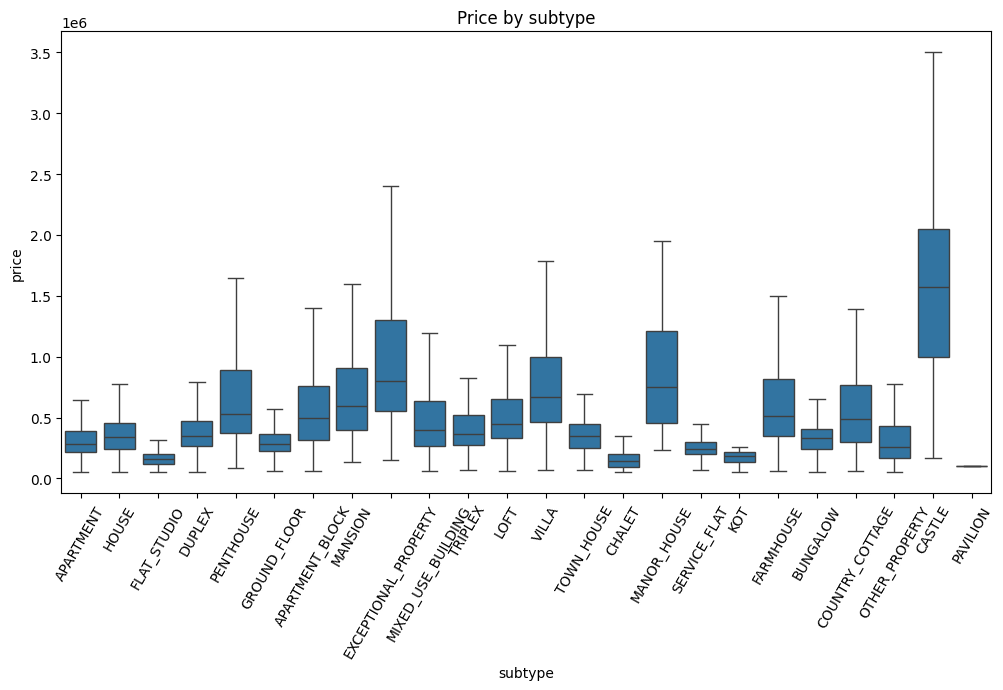

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='subtype', y='price', data=df_subtype,  showfliers=False )
plt.xticks(rotation=60)
plt.title('Price by subtype')
plt.show()

#### Habitable Surface

In [71]:
df_encoded['habitableSurface'].describe()

count     67585.000000
mean        177.456788
std         820.491723
min           6.000000
25%          93.000000
50%         140.000000
75%         200.000000
max      185347.000000
Name: habitableSurface, dtype: float64

In [101]:
df_surface = df_encoded[['habitableSurface', 'price', 'type', 'subtype']]

In [102]:
df_surface_wo_out = remove_outliers_iqr(df_surface, 'habitableSurface')

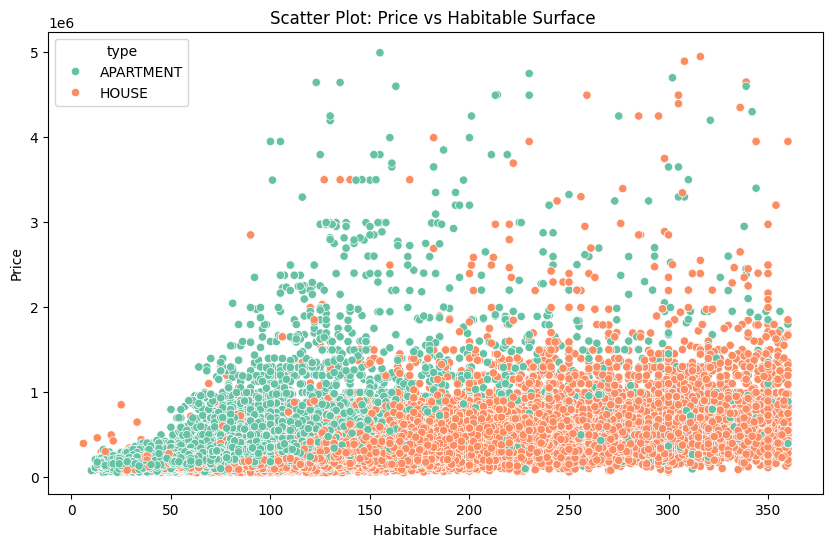

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_surface_wo_out, x='habitableSurface', y='price',  hue='type', palette='Set2' )
plt.title('Scatter Plot: Price vs Habitable Surface ')
plt.xlabel('Habitable Surface')
plt.ylabel('Price')
plt.show()

In [21]:
correlation_surface= df_encoded['habitableSurface'].corr(df_encoded['price'])
print(f"Pearson correlation for 'price' vs 'habitableSurface': {correlation_surface}")

Pearson correlation for 'price' vs 'habitableSurface': 0.09567451341174585


##### Surface histogram

In [33]:
df_surface_wo_out = remove_outliers_iqr(df_surface, 'habitableSurface')

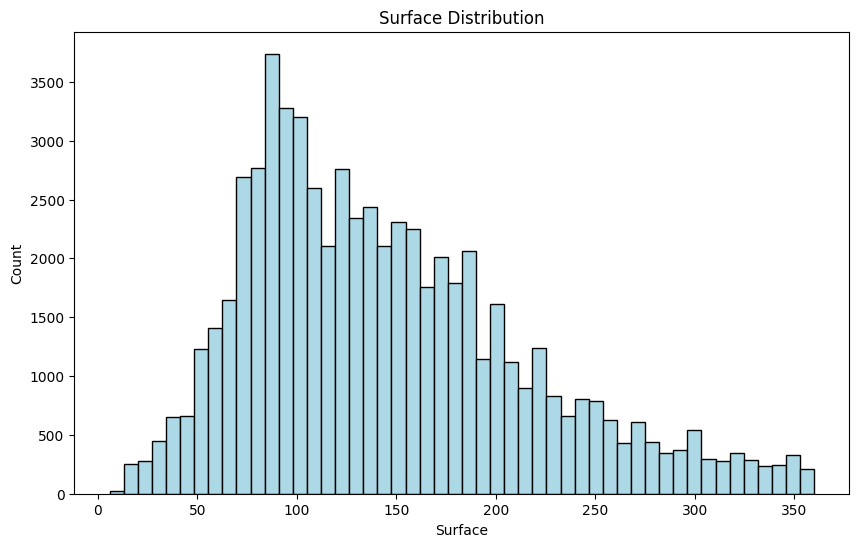

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(df_surface_wo_out['habitableSurface'], bins=50, color='lightblue', edgecolor='black')
plt.title('Surface Distribution')
plt.xlabel('Surface')
plt.ylabel('Count')
plt.show()

#### Number of bedrooms

In [23]:
df_encoded['bedroomCount'].value_counts()

bedroomCount
3.0     24574
2.0     21409
4.0     11636
1.0      7805
5.0      4386
6.0      1832
7.0       659
8.0       344
9.0       166
10.0      125
Name: count, dtype: int64

In [24]:
df_bedroom = df_encoded[['bedroomCount', 'price']]
df_bedroom

,bedroomCount,price
0,2.0,399000.0
1,4.0,895000.0
2,2.0,465000.0
3,2.0,590000.0
4,1.0,289000.0
...,...,...
76098,4.0,649000.0
76099,3.0,279000.0
76100,3.0,299000.0
76101,3.0,325000.0


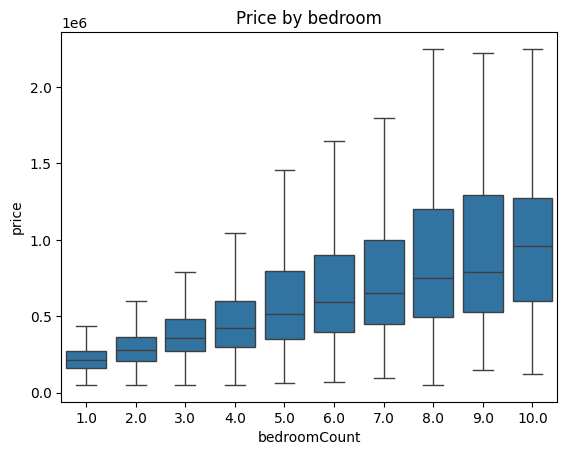

In [25]:
bedroom_plot = sns.boxplot(x='bedroomCount', y='price', data=df_bedroom , showfliers=False )
plt.title('Price by bedroom')
plt.show()

In [47]:
correlation_bedroom = df_encoded['bedroomCount'].corr(df_encoded['price'])
print(f"Pearson correlation for 'price' vs 'bedroomCount': {correlation_bedroom}")

Pearson correlation for 'price' vs 'bedroomCount': 0.3703542570604249


In [ ]:
#### Number of bedrooms


In [ ]:
df_encoded['bathroomCount'].value_counts()
df_bedroom = df_encoded[['bathroomCount', 'price']]
df_bedroom


In [ ]:
bedroom_plot = sns.boxplot(x='bathroomCount', y='price', data=df_bedroom , showfliers=False )
plt.title('Price by bathroom')
plt.show()
correlation_bedroom = df_encoded['bathroomCount'].corr(df_encoded['price'])
print(f"Pearson correlation for 'price' vs 'bedroomCount': {correlation_bedroom}")